Optimization terminated successfully.
         Current function value: 93048.782552
         Iterations: 17
         Function evaluations: 34
Optimization terminated successfully.
         Current function value: 93048.942844
         Iterations: 17
         Function evaluations: 34


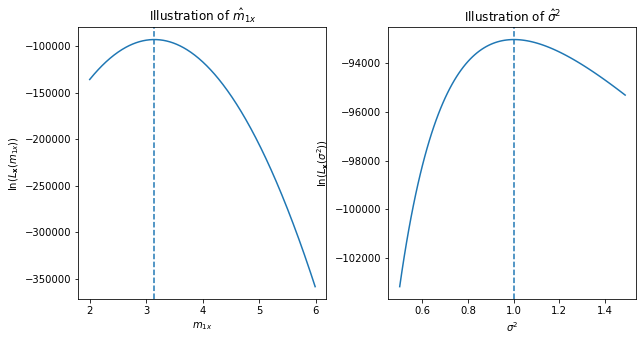

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

# observed Gaussian data
N = 2**16
mu = np.pi
sigma2 = 1
np.random.seed(1)
x = np.random.normal(mu, np.sqrt(sigma2), N)

# LogLikelyhood of mu
def negloglikemu(muv):
    return N/2*np.log(2*np.pi)+N/2*np.log(sigma2)\
    +(np.sum(np.square(x))-2*muv*np.sum(x)+N*muv**2)/(2*sigma2)
# LogLikelyhood of sigma2
def negloglike(sv):
    return N/2*np.log(2*np.pi)+N/2*np.log(sv)\
    +(np.sum(np.square(x))-2*mu*np.sum(x)+N*mu**2)/(2*sv)

# plotting framework 
rr = np.arange(2, 6, 0.01)
rr2 = np.arange(0.5, 1.5, 0.01)
f, axes = plt.subplots(1, 2, figsize=(10, 5), sharex=False)
plt.subplots_adjust(wspace=.25,hspace=0)
axes[0].plot(rr, -negloglikemu(rr))
axes[0].set_xlabel('$m_{1x}$')
axes[0].set_ylabel('$\ln(L_{\mathbf{x}}(m_{1x}))$')

# optimizing the LogLikelyhood
from scipy.optimize import fmin
import math
# estimates of mu  and sigma2
mumin = fmin(negloglikemu,np.array([2]))
sigma2min = fmin(negloglike,np.array([2]))

#plotted curves
axes[0].axvline(x=mumin,linestyle='--')
axes[1].plot(rr2, -negloglike(rr2))
axes[0].set_title('Illustration of $\hat{m}_{1x}$')
axes[1].set_xlabel('$\sigma^2$')
axes[1].set_ylabel('$\ln(L_{\mathbf{x}}(\sigma^2))$')
axes[1].set_title('Illustration of $ \hat{\sigma}^2$')
axes[1].axvline(x=sigma2min,linestyle='--')
plt.savefig('loglike.eps', dpi=300, bbox_inches='tight')
plt.show()